In [176]:
# Importing libraries and packages

# %load_ext autoreload
# %autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.utils import shuffle
import os
import re


In [177]:
# Adjust dataframe display options to view full output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 10)

In [178]:
# Importing returned and non-returned patients datasets

path = "C:/Users/phuro/UCSD/Project_WHEL/data"

returned_fp = os.path.join(path, 'Preprocessed-Data', 'returners.csv')
returned = pd.read_csv(returned_fp).iloc[:, 1:8]

unreturned_fp = os.path.join(path, 'Preprocessed-Data', 'non_returners.csv')
unreturned = pd.read_csv(unreturned_fp).iloc[:, 1:8]

print(returned.shape)
print(unreturned.shape)

returned.head()

(1989, 7)
(872, 7)


,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status
0,1018,56,58,1,5,2,1
1,1019,67,71,1,7,4,0
2,1022,50,53,1,7,4,1
3,1026,51,52,1,7,2,1
4,1027,64,67,1,7,2,0


In [179]:
unreturned.head()

,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status
0,1003,51,53,1,8,2,1
1,1011,42,42,5,7,2,1
2,1017,45,45,1,9,2,1
3,1034,61,62,1,5,4,0
4,1039,42,43,1,7,1,1


In [180]:
# Importing endpoints dataset (conclusion statistics at end of study)

ep_fp = os.path.join(path, 'endpoints.xls')
ep = pd.read_excel(ep_fp).iloc[:, [0, 14]]
ep.rename(columns={'id': 'ID'}, inplace=True)
ep.head()


,ID,site0
0,1002,1
1,1003,1
2,1005,1
3,1007,1
4,1008,1


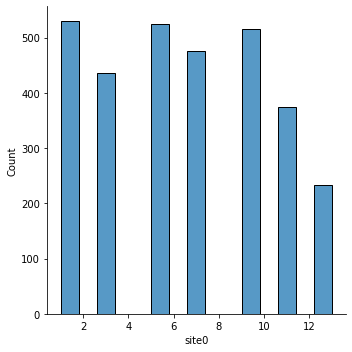

In [181]:
# 15.  Excel Column O
# 	WHEL Clinical Site
# 		1 Site A in California
# 		3 Site B in California
# 		5 Site C in California
# 		7 Site in Arizona
# 		9 Site D in California
# 		11 Site in Texas
# 		13 Site in Oregon

sns.displot(ep['site0'])

In [182]:
# Merge returners and nonreturners with ep 

returners = returned.merge(ep, on='ID', how='inner')
print(returners.shape)

nonreturners = unreturned.merge(ep, on='ID', how='inner')
print(nonreturners.shape)


(1989, 8)
(872, 8)


In [183]:
# Replacing study site numeric codes to state strings/names

returners['site'] = returners['site0'].replace({1: 'CA', 3: 'CA', 5: 'CA', \
    7: 'AZ', 9: 'CA', 11: 'TX', 13: 'OR'})
returners.drop(columns=['site0'], inplace=True)

nonreturners['site'] = nonreturners['site0'].replace({1: 'CA', 3: 'CA', 5: 'CA', \
    7: 'AZ', 9: 'CA', 11: 'TX', 13: 'OR'})
nonreturners.drop(columns=['site0'], inplace=True)

In [184]:
def plot_dist(df, col, title="", y_log_scale=False):

    """

    Function to plot the distribution of column {col}

    Args:
        df (DataFrame): dataframe to plot
        col (str): name of column to plot distribution
        y_log_scale (bool): whether y-axis (count) should be in log scale
        title: specified title for plot

    Return:
        A seaborn plot of the distribution of column {col}

    """

    if y_log_scale:
        p = sns.displot(df[col], log_scale=[False, True])
        p.set(xlabel=col, ylabel='count in log scale')
    else:
        p = sns.displot(df[col])
        p.set_axis_labels(xlabel=col, ylabel='count')
    
    p.set(title=title if len(title) > 0 else f'{col} distribution')

    return p

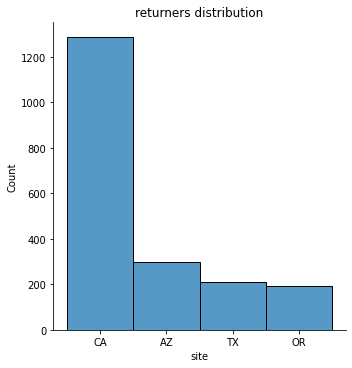

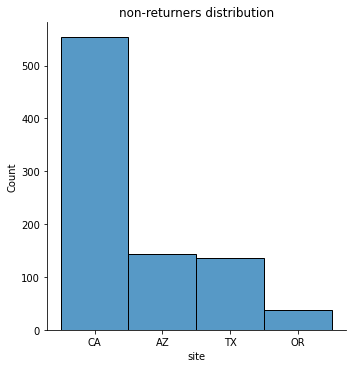

In [185]:
plot_dist(returners, 'site', 'returners distribution')
plot_dist(nonreturners, 'site', 'non-returners distribution')

C:\Users\phuro\AppData\Local\Temp\ipykernel_34576\2901844921.py:2: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\phuro\AppData\Local\Temp\ipykernel_34576\2901844921.py:4: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



(33.235122832858465, 1584.893192461114)

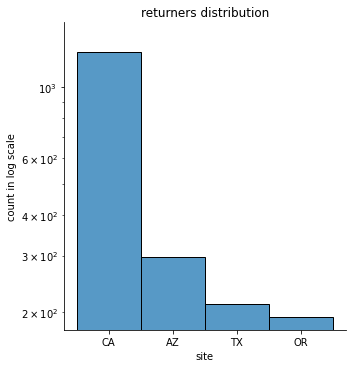

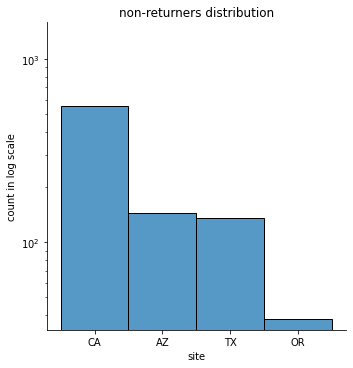

In [186]:
fig1 = plot_dist(returners, 'site', 'returners distribution', y_log_scale=True)
plt.ylim(0, 10**3.2)
fig2 = plot_dist(nonreturners, 'site', 'non-returners distribution', y_log_scale=True)
plt.ylim(0, 10**3.2)

In [187]:
px.histogram(returners, x='site', histnorm='probability')

In [188]:
px.histogram(nonreturners, x='site', histnorm='probability')

In [189]:
returners['status'] = ['returned']*returners.shape[0]
nonreturners['status'] = ['unreturned']*nonreturners.shape[0]

df = pd.concat([returners, nonreturners], ignore_index=True)
df = shuffle(df)
df

,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status,site,status
2679,9471,54,55,1,7,5,0,CA,unreturned
1160,7383,57,58,1,9,2,0,AZ,returned
2329,5156,45,49,3,8,2,1,CA,unreturned
2072,1247,52,55,1,7,2,0,CA,unreturned
353,3098,48,52,1,9,2,1,CA,returned
...,...,...,...,...,...,...,...,...,...
1120,7301,47,49,1,7,2,1,AZ,returned
1208,7467,58,61,1,9,2,1,AZ,returned
623,5036,37,38,1,9,2,1,CA,returned
2564,7456,40,42,1,7,1,1,AZ,unreturned


In [190]:
data = df[['site', 'status']].reset_index(drop=True)
data

,site,status
0,CA,unreturned
1,AZ,returned
2,CA,unreturned
3,CA,unreturned
4,CA,returned
...,...,...
2856,AZ,returned
2857,AZ,returned
2858,CA,returned
2859,AZ,unreturned


In [191]:
os.chdir("C:/Users/phuro/UCSD/Project_WHEL/data")
wp = os.path.join('interim', 'return_status_by_site.csv')
data.to_csv(wp)


In [192]:
df

,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status,site,status
2679,9471,54,55,1,7,5,0,CA,unreturned
1160,7383,57,58,1,9,2,0,AZ,returned
2329,5156,45,49,3,8,2,1,CA,unreturned
2072,1247,52,55,1,7,2,0,CA,unreturned
353,3098,48,52,1,9,2,1,CA,returned
...,...,...,...,...,...,...,...,...,...
1120,7301,47,49,1,7,2,1,AZ,returned
1208,7467,58,61,1,9,2,1,AZ,returned
623,5036,37,38,1,9,2,1,CA,returned
2564,7456,40,42,1,7,1,1,AZ,unreturned


In [193]:
os.getcwd()

'C:\\Users\\phuro\\UCSD\\Project_WHEL\\data'

#### Next steps: Merge more columns to do perform multiple permutation tests for assessing statistical significance, as well as conducting False Discovery Rate correction

In [194]:
# Import datasets containing other columns

fp = os.path.join('Baseline-Data', 'LIFESTYLE.xls')
ls = pd.read_excel(fp)

fp = os.path.join('Baseline-Data', 'FAMHX.xls')
fh = pd.read_excel(fp)

fp = os.path.join('Baseline-Data', 'REPROHX.xls')
rh = pd.read_excel(fp)

fp = os.path.join('Baseline-Data', 'carot0.xls')
bc = pd.read_excel(fp)

fp = os.path.join('Baseline-Data', 'Medical.xls')
md = pd.read_excel(fp, usecols=['ID', 'Tumor Type', 'Chemo', 'Bld Pres -Sys', \
    'Bld Pres - Dias', 'BMI', 'Lump/Mast'])

fp = os.path.join('Baseline-Data', 'NDSDIET.xls')
fd = pd.read_excel(fp, usecols=['ID', '% Protein', '% Fat', '% Carb', '% Alcohol'])

fp = os.path.join('Baseline-Data', 'phbase.xls')
ph = pd.read_excel(fp, usecols=['ID', 'smoking status', 'pack years', 'NEW METS', \
    'wgt history'])

fp = os.path.join('Baseline-Data', 'Health_Status.xls')
hs = pd.read_excel(fp, usecols=['ID', 'hospital_', 'Blood_Sugar', 'Cardiovascular', \
    'Digestive', 'Arthritis', 'Osteoporosis'])

fp = os.path.join(path, 'endpoints.xls')
ep = pd.read_excel(fp, usecols=['id', 'vitality', 'othcstatus', 'grade', 'newstage'])

fp = os.path.join('Baseline-Data', 'Nsupps.xls')
sp = pd.read_excel(fp)

data_dict = {'lifestyle': ls, 'famhist': fh, 'reprohist': rh, 'bldcarot': bc, \
    'medical': md, 'ndsfood': fd, 'habits': ph, 'hlthstatus': hs, 'supp': sp,
    'endpoint': ep}

In [195]:
# Merge datasets into df

for dataset in data_dict.values():
    dataset.columns = dataset.columns.map(lambda x: re.sub(r'^id$', 'ID', x))
    df = df.merge(dataset, how='left', on='ID')

In [196]:
dropcols = ["age at rand", "# second deg relatives with any cancer", \
    "# second deg relatives (granparents, aunts, uncles)", 
    "# first deg relatives with any cancer", "# first deg relatives", 
    "health insurance", "time at max wgt", "pre-BC weight", "age18 weight",
    "shopping help", "cleanup help", "cooking help"]

df.drop(columns=dropcols, inplace=True)

In [197]:
df

,ID,age at dx,Ethnicity,Education,Marital Status,Empl. Status,site,status,main meals,snacks,meals out,cooking time,adults,children,I cook?,I clean up?,shopping freq,grocery bill,I buy food?,weight,time at weight,max weight,insurance change?,insurance satisfaction,years in state,where born,age15 residence,age35 residence,age50 residence,longest residence,adopted?,# first deg relatives with breast cancer,# second deg relatives with breast cancer,mom had BC?,mom had ovarian cancer?,# sisters,# sisters with breast cancer,# sisters with ovarian cancer,# first deg relatives with colorectal cancer,# second deg relatives with colorectal cancer,Menarch Age,# Times Pregnant,# Live Births,Age at First Live Birth,Months Full Breast Feeding,Months Partial Breastfeeding,Age at Menopause,Hysterectomy,# Oophorectomies,Hormonal Birth Control,Birth Control Type,Years of Birth Control,HRT,HRT Type,Years of HRT,# Previous Breast Biopsies,lutein,cryptox,lycopene,alphacar,betacar,Lump/Mast,Chemo,Tumor Type,BMI,Bld Pres -Sys,Bld Pres - Dias,% Protein,% Fat,% Carb,% Alcohol,smoking status,pack years,NEW METS,wgt history,hospital_,Blood_Sugar,Cardiovascular,Digestive,Arthritis,Osteoporosis,Number of Supplements,Amino Acids,Antioxidants,Carotenoids,Herbals/Not Phytoestrogens,Herbals/Phytoestrogens,Minerals/Calcium,Minerals/Not Calcium,Miscellaneous,Multi-Vitamin,Multi-vitamin/mineral,Other nutrients,Probiotics/Enzymes,Protein Supplements/Soy,Vitamin A,Vitamin B,Vitamin C,Vitamin D,Vitamin E,Vitamin K,vitality,othcstatus,grade,newstage
0,9471,54,1,7,5,0,CA,unreturned,16.0,8.0,4.0,35.0,1.0,NaN,1.0,1.0,1.0,25.0,1.0,146.0,0.5,148.0,1.0,9.0,4.0,1,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,10.0,2.0,2.0,18.0,6.0,3.0,51.0,0.0,0.0,1.0,1.0,5.0,1.0,2.0,10.0,NaN,0.5150,0.2428,0.9518,0.3087,1.0113,2,2,3,24.9108,124,96,18.924077,29.524726,50.142715,3.887337,2,7.0000,945.0,4,0.0,0.0,0.0,1.0,0.0,0.0,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.0,1,2
1,7383,57,1,9,2,0,AZ,returned,21.0,0.0,2.0,55.0,2.0,0.0,1.0,1.0,1.0,100.0,1.0,218.0,8.0,218.0,1.0,8.0,1.0,3,3.0,4.0,4.0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,2.0,2.0,27.0,0.0,0.0,47.0,0.0,0.0,1.0,1.0,14.0,1.0,2.0,10.0,NaN,0.2237,0.1666,0.3300,0.1132,0.2663,2,2,3,37.8260,96,75,17.659007,24.663251,57.057056,3.478212,1,22.5000,1785.0,2,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.0,3,1
2,5156,45,3,8,2,1,CA,unreturned,14.0,16.0,7.0,35.0,2.0,0.0,1.0,1.0,1.0,75.0,1.0,198.0,0.5,207.0,1.0,9.0,4.0,1,1.0,1.0,1.0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,2.0,15.0,0.0,0.0,44.0,0.0,0.0,1.0,1.0,5.0,0.0,NaN,NaN,NaN,0.1574,0.1460,0.3600,0.0595,0.1581,1,2,3,34.6098,-9,-9,15.294056,31.070694,56.07326,0.00538,3,0.0000,850.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,3,2
3,1247,52,1,7,2,0,CA,unreturned,16.0,13.0,1.0,55.0,2.0,0.0,1.0,1.0,1.0,NaN,1.0,169.0,2.0,169.0,5.0,8.0,4.0,3,3.0,3.0,1.0,3,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,3.0,3.0,20.0,6.0,0.0,42.0,1.0,1.0,1.0,1.0,7.0,1.0,4.0,10.0,NaN,0.4145,0.1256,0.5800,0.2100,0.6182,1,1,3,29.5006,-9,-9,18.706712,32.766762,49.53105,0.137278,2,25.0000,450.0,2,0.0,0.0,0.0,0.0,1.0,1.0,9,0,0,0,3,0,1,2,1,0,0,0,0,0,0,1,1,0,0,0,1,0.0,3,1
4,3098,48,1,9,2,1,CA,returned,20.0,5.0,0.0,35.0,2.0,0.0,1.0,1.0,1.0,100.0,1.0,130.0,1.0,142.0,1.0,9.0,4.0,4,4.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,3.0,2.0,24.0,11.0,0.0,48.0,0.0,0.0,1.0,1.0,12.0,0.0,1.0,1.0,NaN,0.3378,0.3948,1.2372,0.5279,1.6302,1,2,3,22.6540,-9,-9,19.750513,30.613405,52.198382,0.009328,3,0.0000,450.0,4,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [212]:
# Inspect missingness to assess interpretability (how reflective of reality) of later results

pd.set_option('display.max_rows', None)
df_ = df.isna().sum().reset_index()
df_[df_[0] > 500].rename(columns={0: '# missing'})


,index,# missing
30,adopted?,530
43,Age at First Live Birth,645
46,Age at Menopause,609
50,Birth Control Type,720
51,Years of Birth Control,750
53,HRT Type,1512
54,Years of HRT,1529
55,# Previous Breast Biopsies,2153


In [216]:
pd.set_option('display.max_rows', 10)

In [200]:
df.shape

(2861, 105)

In [214]:
# sanity check 
# as shown, empty values are ignored in size pivot table

df.pivot_table(index='adopted?', columns='status', aggfunc='size')

status,returned,unreturned
adopted?,,
0.0,1617,669
1.0,30,15


In [217]:
df

,ID,age at dx,Ethnicity,Education,Marital Status,Empl. Status,site,status,main meals,snacks,meals out,cooking time,adults,children,I cook?,I clean up?,shopping freq,grocery bill,I buy food?,weight,time at weight,max weight,insurance change?,insurance satisfaction,years in state,where born,age15 residence,age35 residence,age50 residence,longest residence,adopted?,# first deg relatives with breast cancer,# second deg relatives with breast cancer,mom had BC?,mom had ovarian cancer?,# sisters,# sisters with breast cancer,# sisters with ovarian cancer,# first deg relatives with colorectal cancer,# second deg relatives with colorectal cancer,Menarch Age,# Times Pregnant,# Live Births,Age at First Live Birth,Months Full Breast Feeding,Months Partial Breastfeeding,Age at Menopause,Hysterectomy,# Oophorectomies,Hormonal Birth Control,Birth Control Type,Years of Birth Control,HRT,HRT Type,Years of HRT,# Previous Breast Biopsies,lutein,cryptox,lycopene,alphacar,betacar,Lump/Mast,Chemo,Tumor Type,BMI,Bld Pres -Sys,Bld Pres - Dias,% Protein,% Fat,% Carb,% Alcohol,smoking status,pack years,NEW METS,wgt history,hospital_,Blood_Sugar,Cardiovascular,Digestive,Arthritis,Osteoporosis,Number of Supplements,Amino Acids,Antioxidants,Carotenoids,Herbals/Not Phytoestrogens,Herbals/Phytoestrogens,Minerals/Calcium,Minerals/Not Calcium,Miscellaneous,Multi-Vitamin,Multi-vitamin/mineral,Other nutrients,Probiotics/Enzymes,Protein Supplements/Soy,Vitamin A,Vitamin B,Vitamin C,Vitamin D,Vitamin E,Vitamin K,vitality,othcstatus,grade,newstage
0,9471,54,1,7,5,0,CA,unreturned,16.0,8.0,4.0,35.0,1.0,NaN,1.0,1.0,1.0,25.0,1.0,146.0,0.5,148.0,1.0,9.0,4.0,1,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,10.0,2.0,2.0,18.0,6.0,3.0,51.0,0.0,0.0,1.0,1.0,5.0,1.0,2.0,10.0,NaN,0.5150,0.2428,0.9518,0.3087,1.0113,2,2,3,24.9108,124,96,18.924077,29.524726,50.142715,3.887337,2,7.0000,945.0,4,0.0,0.0,0.0,1.0,0.0,0.0,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.0,1,2
1,7383,57,1,9,2,0,AZ,returned,21.0,0.0,2.0,55.0,2.0,0.0,1.0,1.0,1.0,100.0,1.0,218.0,8.0,218.0,1.0,8.0,1.0,3,3.0,4.0,4.0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,2.0,2.0,27.0,0.0,0.0,47.0,0.0,0.0,1.0,1.0,14.0,1.0,2.0,10.0,NaN,0.2237,0.1666,0.3300,0.1132,0.2663,2,2,3,37.8260,96,75,17.659007,24.663251,57.057056,3.478212,1,22.5000,1785.0,2,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.0,3,1
2,5156,45,3,8,2,1,CA,unreturned,14.0,16.0,7.0,35.0,2.0,0.0,1.0,1.0,1.0,75.0,1.0,198.0,0.5,207.0,1.0,9.0,4.0,1,1.0,1.0,1.0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,2.0,15.0,0.0,0.0,44.0,0.0,0.0,1.0,1.0,5.0,0.0,NaN,NaN,NaN,0.1574,0.1460,0.3600,0.0595,0.1581,1,2,3,34.6098,-9,-9,15.294056,31.070694,56.07326,0.00538,3,0.0000,850.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,3,2
3,1247,52,1,7,2,0,CA,unreturned,16.0,13.0,1.0,55.0,2.0,0.0,1.0,1.0,1.0,NaN,1.0,169.0,2.0,169.0,5.0,8.0,4.0,3,3.0,3.0,1.0,3,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,3.0,3.0,20.0,6.0,0.0,42.0,1.0,1.0,1.0,1.0,7.0,1.0,4.0,10.0,NaN,0.4145,0.1256,0.5800,0.2100,0.6182,1,1,3,29.5006,-9,-9,18.706712,32.766762,49.53105,0.137278,2,25.0000,450.0,2,0.0,0.0,0.0,0.0,1.0,1.0,9,0,0,0,3,0,1,2,1,0,0,0,0,0,0,1,1,0,0,0,1,0.0,3,1
4,3098,48,1,9,2,1,CA,returned,20.0,5.0,0.0,35.0,2.0,0.0,1.0,1.0,1.0,100.0,1.0,130.0,1.0,142.0,1.0,9.0,4.0,4,4.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,3.0,2.0,24.0,11.0,0.0,48.0,0.0,0.0,1.0,1.0,12.0,0.0,1.0,1.0,NaN,0.3378,0.3948,1.2372,0.5279,1.6302,1,2,3,22.6540,-9,-9,19.750513,30.613405,52.198382,0.009328,3,0.0000,450.0,4,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [219]:
quanti_cols = ["age at dx", "main meals", "snacks", "meals out", "cooking time", "adults", \
    "children", "shopping freq", "grocery bill", "weight", "time at weight",
    "max weight", "years in state", "# first deg relatives with breast cancer",
    "# second deg relatives with breast cancer", "# sisters", 
    "# sisters with breast cancer",	"# sisters with ovarian cancer",
    "# first deg relatives with colorectal cancer", 
    "# second deg relatives with colorectal cancer", "Menarch Age", 
    "# Times Pregnant", "# Live Births", "Age at First Live Birth", 
    "Months Full Breast Feeding", "Months Partial Breastfeeding", 
    "Age at Menopause", "Years of Birth Control", "Years of HRT",	
    "# Previous Breast Biopsies", "lutein", "cryptox", "lycopene", "alphacar", 
    "betacar", "BMI", "Bld Pres -Sys", "Bld Pres - Dias", "% Protein", "% Fat", 
    "% Carb", "% Alcohol", "pack years", "NEW METS", "Number of Supplements"]
